### Custom model visualization

#### This notebook is a walkthrough to use TensorFlow's amazing visualization tool, Lucid, on your custom built TensorFlow CNN models. 

#### Please star if you like my notebook, thanks :)

In [1]:
# Import all modules for lucid visualization

from lucid.modelzoo.vision_base import Model
import tensorflow as tf
import numpy as np
import lucid.optvis.render as render
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import matplotlib.pyplot as plt
import os
from os import mkdir

/home/vijay/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Create a class for your custom model by inheriting 
# lucid's Model superclass..
# Mention input_name with scoping..

class EID_Resnet_6reg(Model):
    model_path = '/media/data_cifs/clicktionary/clickme_experiment/nsf_correlation_models/6_reg/frozen_model.pb.modelzoo'
    image_shape = [224,224,3]
    image_value_range = (0,1)
    input_name = 'cnn/rgb'

In [58]:
# This is where the real deal happens. 

eid = EID_Resnet_6reg()
eid.load_graphdef()

# Feel free to substitute 'Conv2D' with any kind of layer you'd like to visualize

all_convs = [node.name for node in eid.graph_def.node if 'Conv2D' in node.name]
channel = lambda n: objectives.channel('cnn/conv2d_35/Conv2D', n)

# Creates example objective functions for the first 5 neurons in Conv2d_35
objs = [channel(i) for i in range(5)]
param_f = lambda: param.image(224)

Rendering visualizations for layer cnn/conv2d/Conv2D
Rendering visualizations for neuron-0
0 0.6199551



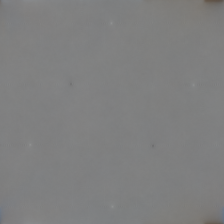

1000 1.1240281



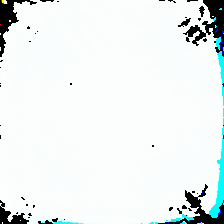

2000 1.1053761



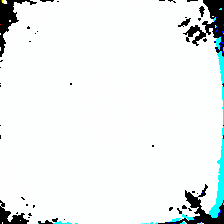

3000 1.124532



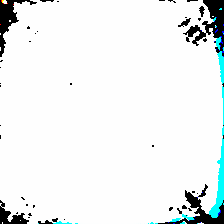

4000 1.1245672



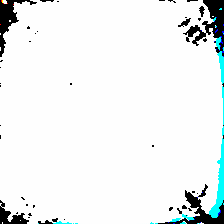

5000 1.1329324



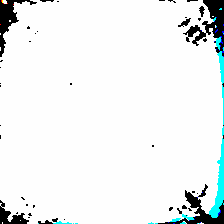

6000 1.1095874



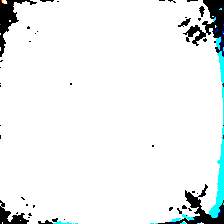

7000 1.1269097



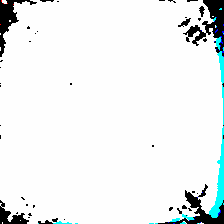

8000 1.1182153



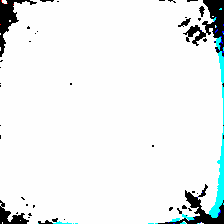

9000 1.1431288



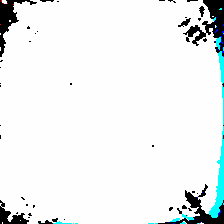

Saved in ./Lucid-Visualizations/cnn_conv2d_Conv2D/Visualized_Rendering_0_cnn_conv2d_Conv2D.npy
Rendering visualizations for neuron-1
0 1.4507056



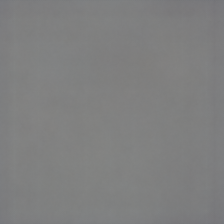

1000 7.2415633



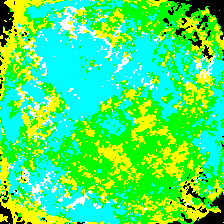

2000 7.219468



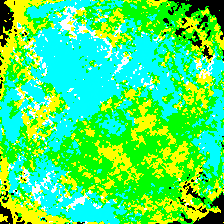

3000 7.386479



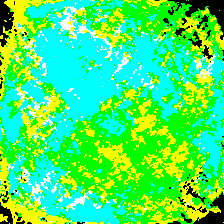

4000 7.3996496



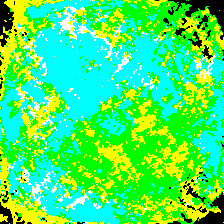

In [ ]:
# Iterate over all objectives you created for different neurons
def makedir(path):
    if not os.path.exists(path):
        mkdir(path)
        
master_output_path = './Lucid-Visualizations'
makedir(master_output_path)

for layer in all_convs:
    print 'Rendering visualizations for layer %s'%(layer)
    
    # Create directories to store rendered visualizations
    
    curr_conv_layer = '_'.join(layer.split('/'))
    layer_output_path = os.path.join(master_output_path,
                                        curr_conv_layer)
    makedir(layer_output_path)
    
    # Create objective functions for the current layer (sample code for first 5 neurons)
    channel = lambda n: objectives.channel(layer, n)
    objs = [channel(i) for i in range(10)]
    
    # Main loop for rendering visualizations
    for ind_obj, obj in enumerate(objs):
        print 'Rendering visualizations for neuron-%s'%(ind_obj)
        
        # Store/display rendered visualizations 
        # upto 1000 iterations, at 200 step intervals
        
        imgs = render.render_vis(eid, obj, param_f, thresholds=np.arange(0,10000,1000))
        curr_layer_fn = 'Visualized_Rendering_%s_%s.npy'%(ind_obj,
                                                          curr_conv_layer)
        curr_layer_path = os.path.join(layer_output_path, curr_layer_fn)
        np.save(curr_layer_path, imgs)
        print 'Saved in %s'%(curr_layer_path)
